In [1]:
import numpy as np
import itertools
import os

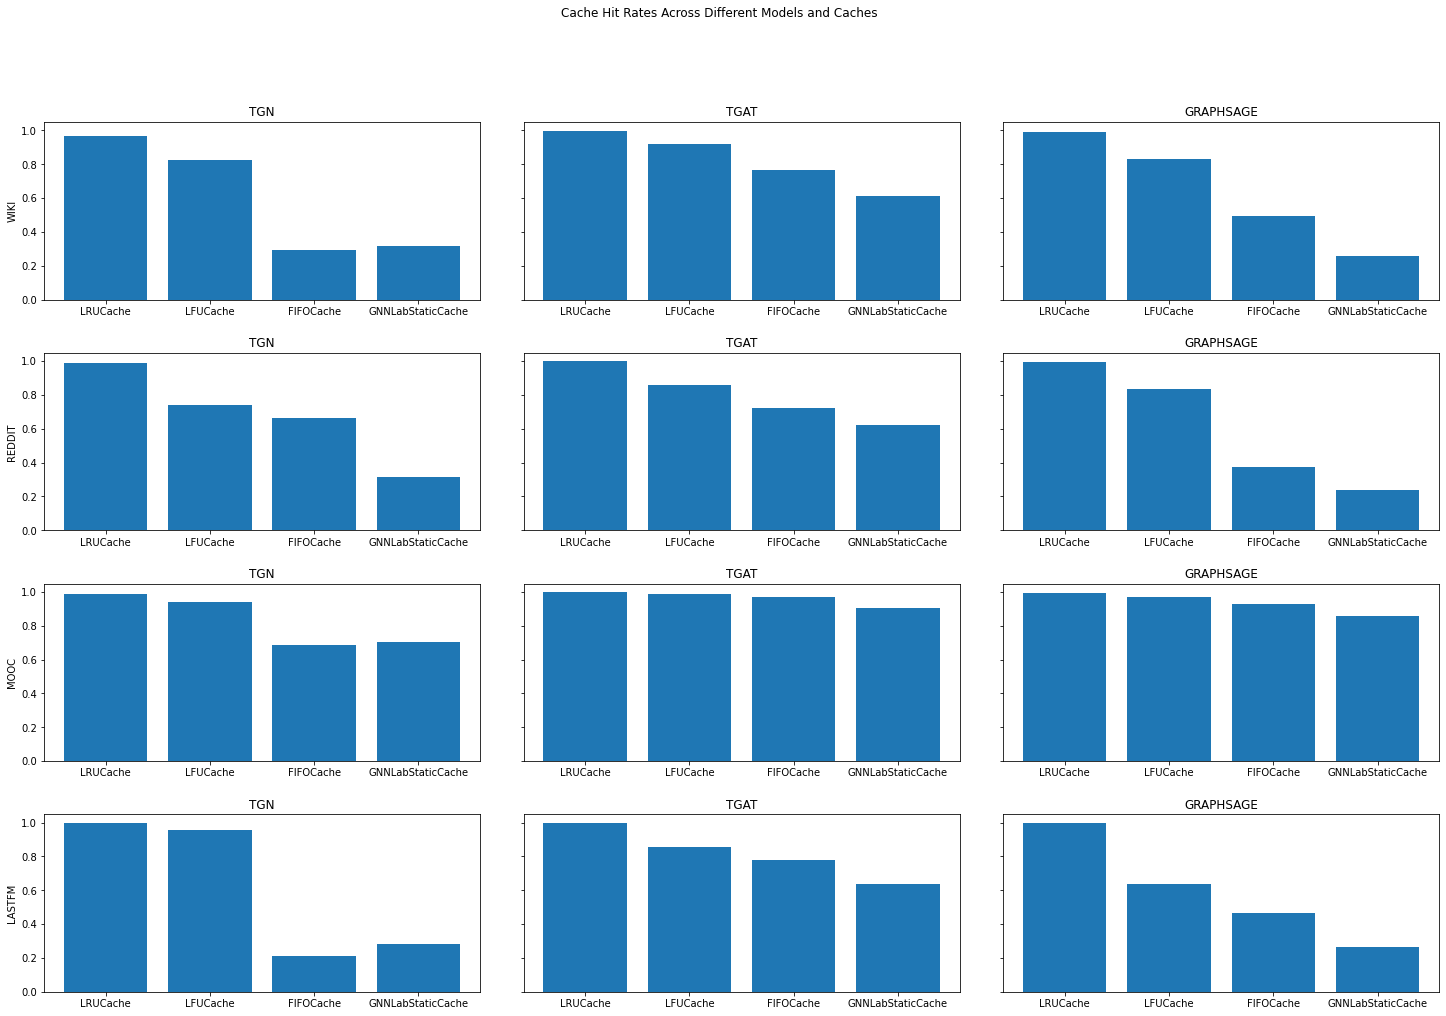

In [9]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

models = ['TGN', 'TGAT', 'GRAPHSAGE']
datasets = ['WIKI', 'REDDIT', 'MOOC', 'LASTFM']
cache = ['LRUCache', 'LFUCache', 'FIFOCache', 'GNNLabStaticCache']
param_space = itertools.product(models, datasets, cache)

subdir = 'edge_cache/'
prefix = "_{}_{}_{}.npy"

fig, axs = plt.subplots(len(datasets), len(
    models), figsize=(25, 16), sharey=True)
fig.subplots_adjust(hspace=0.3, wspace=0.05)
fig.suptitle('Cache Hit Rates Across Different Models and Caches')

for i, data in enumerate(datasets):
    for j, model in enumerate(models):
        hit_rates = []
        for c in cache:
            hit_rate = np.load(subdir + "edge_cache_hit_rate" +
                               prefix.format(model, data, c)).mean()
            hit_rates.append(hit_rate)
        axs[i][j].bar(cache, hit_rates)
        axs[i][j].set_title(model)
        if j == 0:
            axs[i][j].set_ylabel(data)

plt.show()
